In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

# Ignorando erros
import warnings
warnings.filterwarnings("ignore")

In [2]:
# fonte de dados utilizadas
# Alura: https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados
# Git Módulo 1: https://github.com/dragoc1/Bootcamp_Data_Science_Aplicada/tree/main/Modulo01/dados
url = "https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv"

df = pd.read_csv(url, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')

In [3]:
df.head(3)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05


In [4]:
df.keys()

Index(['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr',
       '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=161)

In [5]:
# Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
gastos_recentes = df[[df.columns[0],df.columns[-2]]]
gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
# Organizando de forma decrescente tendo como referência a última coluna do dataframe
gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

# Ordenando de forma decrescente os Estados
gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])
gastos_recentes.index.name = 'UF'
gastos_recentes.head()

,2021/Mar
UF,
São Paulo,392946147.42
Minas Gerais,200471045.07
Paraná,140264608.52
Rio Grande do Sul,130155185.16
Rio de Janeiro,106837295.81


<AxesSubplot:xlabel='UF'>

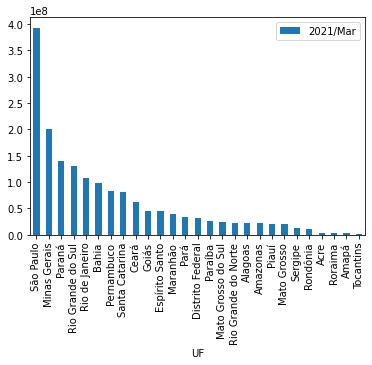

In [6]:
gastos_recentes.plot(kind = 'bar')

<AxesSubplot:xlabel='UF'>

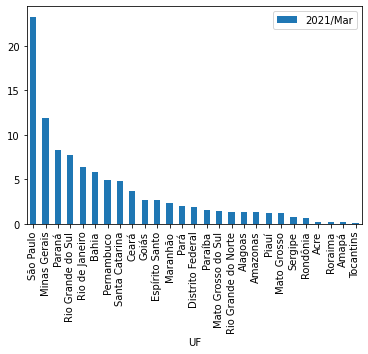

In [7]:
(100*gastos_recentes/gastos_recentes.sum()).plot(kind= 'bar')

In [8]:
# raw.github... para baixar o arquivo ou basta baixar o arquivo do github e copiar o link de download
# https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/estimativa_dou_2020.xls
# Outra opção é substituir o /blob/main por /raw/main que também irá baixar o arquivo

ibge_estimativa = pd.read_excel("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/estimativa_dou_2020.xls")

#ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")

ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


In [9]:
# Buscando os dados do Wikipedia copy and paste

# Por """ """ para criar uma string multilinhas 
dados_wiki = """Posição	Unidade federativa	População	% da pop. total	País comparável(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

In [10]:
# https://docs.python.org/2/library/stringio.html
from io import StringIO

# Criando uma Sring a partir do que copiamos anteriormente
dados_wiki_io = StringIO(dados_wiki) # leitor de String
wiki = pd.read_csv(dados_wiki_io, sep = '\t'); # \t para pegar os valores separados por tab
wiki.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável(habitantes)
0,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [11]:
# Obtendo somente as coluns que nos interessam, no caso, a coluna 'Unidade federativa' e 'População'
wiki = wiki[[wiki.columns[1],wiki.columns[2]]]

In [12]:
wiki['População'] = wiki['População'].str.replace(" ", "").astype(int)

In [13]:
wiki.head()

,Unidade federativa,População
0,São Paulo,46289333
1,Minas Gerais,21292666
2,Rio de Janeiro,17366189
3,Bahia Bahia,14930634
4,Paraná,11516840


In [14]:
wiki['Unidade federativa'].to_list()

[' São Paulo',
 ' Minas Gerais',
 ' Rio de Janeiro',
 'Bahia Bahia',
 ' Paraná',
 ' Rio Grande do Sul',
 ' Pernambuco',
 ' Ceará',
 'Pará Pará',
 ' Santa Catarina',
 ' Maranhão',
 ' Goiás',
 ' Amazonas',
 ' Espírito Santo',
 ' Paraíba',
 ' Rio Grande do Norte',
 ' Mato Grosso',
 ' Alagoas',
 ' Piauí',
 ' Distrito Federal',
 ' Mato Grosso do Sul',
 ' Sergipe',
 ' Rondônia',
 ' Tocantins',
 ' Acre',
 ' Amapá',
 ' Roraima']

Observe que existe um espaço antes dos estados, para remove-los iremos itilizar a função strip

NÃO ESQUECER do .str.trip(), pois estamos tratando das strings na coluna

In [15]:
wiki['Unidade federativa'] = wiki['Unidade federativa'].str.strip()

Agora iremos remover os estados que possuem o nome duplicado, para isso iremos utilizar um for percorrrendo o index dos gastos mais recentes, pois sabemos que todos os valores estão corretos.



In [16]:
for estado in gastos_recentes.index:
    #print(f"{estado} {estado} => {estado}")
    wiki['Unidade federativa'] = wiki['Unidade federativa'].replace(f"{estado} {estado}", estado) # f dentro do print serve para interpolação

wiki = wiki.set_index(wiki.columns[0])
wiki.index.name = 'UF'
wiki.head()

,População
UF,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [17]:
wiki.join(gastos_recentes)

,População,2021/Mar
UF,,
São Paulo,46289333,392946147.42
Minas Gerais,21292666,200471045.07
Rio de Janeiro,17366189,106837295.81
Bahia,14930634,98746333.07
Paraná,11516840,140264608.52
Rio Grande do Sul,11422973,130155185.16
Pernambuco,9616621,83870992.73
Ceará,9187103,62079618.54
Pará,8690745,33276392.89


# Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

Basta usar usar o read_html do pandas que será possível identificar a tabela e baixar os arquivos como dataframe

In [18]:
# https://pbpython.com/pandas-html-table.html
url = "https://pt.wikipedia.org/w/index.php?title=Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"
tables = pd.read_html(url, match ='População')
len(tables)

3

Foram identificadas 3 tabelas na página que deram o match com 'População', porém somente a primeira delas irá nos interessar.

In [19]:
populacao = pd.DataFrame(tables[0])
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


Limpando os dados, tirando os espaços vazios da coluna região

In [20]:
populacao = populacao.drop([populacao.keys()[0],populacao.keys()[-2],populacao.keys()[-1]], axis = 1)
populacao['População'] = populacao['População'].str.replace(" ", "").astype(int)
populacao = populacao.set_index(populacao.keys()[0])
populacao.index.names = ['UF']
populacao.head()

,População
UF,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [21]:
populacao.index.to_list()

['São Paulo',
 'Minas Gerais',
 'Rio de Janeiro',
 'Bahia',
 'Paraná',
 'Rio Grande do Sul',
 'Pernambuco',
 'Ceará',
 'Pará',
 'Santa Catarina',
 'Maranhão',
 'Goiás',
 'Amazonas',
 'Espírito Santo',
 'Paraíba',
 'Rio Grande do Norte',
 'Mato Grosso',
 'Alagoas',
 'Piauí',
 'Distrito Federal',
 'Mato Grosso do Sul',
 'Sergipe',
 'Rondônia',
 'Tocantins',
 'Acre',
 'Amapá',
 'Roraima']

# Desafio 02 - Neste desafio temos uma série de passos:

- Padronizar os nomes das colunas
- Transformar os dados nos tipos corretos
- Transformar a UF em index

Para os dados da tabela da população estão corretos, agora será necessário limpar os dados dos gastos por estado.

Iremos remover os 3 primeiros caracteres da Coluna 'Unidade da Federação' e utilizar o resultado como Index.

In [22]:
# Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
gastos_recentes = df[[df.columns[0],df.columns[-2]]]
gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
# Organizando de forma decrescente tendo como referência a última coluna do dataframe
gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

# Ordenando de forma decrescente os Estados
gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])
gastos_recentes.index.names = ['UF']
gastos_recentes.head()

,2021/Mar
UF,
São Paulo,392946147.42
Minas Gerais,200471045.07
Paraná,140264608.52
Rio Grande do Sul,130155185.16
Rio de Janeiro,106837295.81


In [23]:
gastos_recentes.index.to_list()

['São Paulo',
 'Minas Gerais',
 'Paraná',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Bahia',
 'Pernambuco',
 'Santa Catarina',
 'Ceará',
 'Goiás',
 'Espírito Santo',
 'Maranhão',
 'Pará',
 'Distrito Federal',
 'Paraíba',
 'Mato Grosso do Sul',
 'Rio Grande do Norte',
 'Alagoas',
 'Amazonas',
 'Piauí',
 'Mato Grosso',
 'Sergipe',
 'Rondônia',
 'Acre',
 'Roraima',
 'Amapá',
 'Tocantins']

In [24]:
populacao.join(gastos_recentes)

,População,2021/Mar
UF,,
São Paulo,46289333,392946147.42
Minas Gerais,21292666,200471045.07
Rio de Janeiro,17366189,106837295.81
Bahia,14930634,98746333.07
Paraná,11516840,140264608.52
Rio Grande do Sul,11422973,130155185.16
Pernambuco,9616621,83870992.73
Ceará,9187103,62079618.54
Pará,8690745,33276392.89


# Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

https://docs.python.org/3/library/string.html

# Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [25]:
def limpa_dados(url_data, url_scrapper):

# Primeira Parte: Buscando os dados do banco de dados do github do módulo 1

    df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')

    # Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
    gastos_recentes = df[[df.columns[0],df.columns[-2]]]
    gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
    # Organizando de forma decrescente tendo como referência a última coluna do dataframe
    gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

    # Ordenando de forma decrescente os Estados
    gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])


# Segunda Parte: Partindo agora para a segunda parte que é pegar os dados da Wikipedia
    tables = pd.read_html(url_scrapper, match ='População')
    populacao = pd.DataFrame(tables[0])
    populacao = populacao.drop([populacao.keys()[0],populacao.keys()[-2],populacao.keys()[-1]], axis = 1)
    populacao['População'] = populacao['População'].str.replace(" ", "").astype(int)
    populacao = populacao.set_index(populacao.keys()[0])
    populacao.index.names = ['UF']

# Retornando o dataset do Wikipedia e também o dataset com a coluna dos gastos mais recentes
    return populacao, populacao.join(gastos_recentes)

In [26]:
pop, gastos = limpa_dados("https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv","https://pt.wikipedia.org/w/index.php?title=Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")

In [27]:
pop.head()

,População
UF,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [28]:
gastos.head()

,População,2021/Mar
UF,,
São Paulo,46289333,392946147.42
Minas Gerais,21292666,200471045.07
Rio de Janeiro,17366189,106837295.81
Bahia,14930634,98746333.07
Paraná,11516840,140264608.52
